In [1]:
import pandas as pd

In [2]:
# raw_data_dir = "/mnt/bal31/jhsu/home/git/tmp/RENET2/data/litcovid/gda_rst.tsv"
raw_data_dir = "../data/litcovid/gda_rst.tsv"


rst = pd.read_csv(raw_data_dir, sep='\t', header=0)

In [3]:
rst.head()

,Unnamed: 0,pmid,geneId,diseaseId,g_name,d_name,prob_avg,prob_X
0,0,32659213,2244,D001778,fibrinogen,Coagulation disorder|coagulopathy,0.52569,0.64447;0.48512;0.43693;0.38273;0.40105;0.6472...
1,1,32659213,2244,C000657245,fibrinogen,COVID-19,0.95127,0.97348;0.94583;0.91583;0.92663;0.95234;0.9508...
2,2,32659213,3552,C000657245,IL-1,COVID-19,0.52286,0.57822;0.50934;0.34244;0.48419;0.44281;0.5779...
3,3,32659213,3558,C000657245,IL-2,COVID-19,0.52286,0.57822;0.50934;0.34244;0.48419;0.44281;0.5779...
4,4,32659213,3569,C000657245,IL-6,COVID-19,0.52286,0.57822;0.50934;0.34244;0.48419;0.44281;0.5779...


In [4]:
covid_rst = rst[rst.diseaseId == '']

In [5]:
all_gdp_df = rst.groupby(['diseaseId'])['d_name'].apply(lambda x: "%s" % ' | '.join(x)).reset_index()
all_gdp_df['mer_s'] = all_gdp_df['d_name'].map(lambda x: ' | '.join(list(sorted(set([i.strip() for i in x.split('|')])))))
all_gdp_df['disease_n'] = all_gdp_df['d_name'].map(lambda x: sorted(set([i.strip() for i in x.split('|')]))[0])
all_gdp_df['cnt'] = rst.groupby(['diseaseId'], as_index=False)['d_name'].size().values

In [6]:
all_gdp_df = all_gdp_df.sort_values(['cnt']).reset_index(drop=True)
all_gdp_df.tail(10).iloc[::-1]

,diseaseId,d_name,mer_s,disease_n,cnt
870,C000657245,COVID-19 | COVID-19 | COVID-19 | COVID-19 | CO...,"(coronavirus disease-2019) infection | 000,000...",(coronavirus disease-2019) infection,9872
869,D007249,inflammation | inflammation | inflammation | i...,EAT inflammation | Excess inflammation | Hyper...,EAT inflammation,779
868,D012128,acute respiratory distress syndrome|ARDS | acu...,ARDS | ARDS P | ARDS inflammation | ARDS lung ...,ARDS,728
867,D018352,coronavirus disease | MERS-CoV infection|MERS-...,CoV S infection | CoV infected | CoV infection...,CoV S infection,451
866,D011014,pneumonia|lung inflammation | pneumonia|pulmon...,IR-pneumonitis | Lung Pneumonia | Lung inflamm...,IR-pneumonitis,356
865,D009765,obesity | obesity|obese | obesity|obesities | ...,British Obesity | OB | OB and N-OB | OB than N...,British Obesity,350
864,D001102,viral skin infections|viral infection | virus ...,GI viral infections | HIV viral infection | Vi...,GI viral infections,344
863,D003643,mortality|death | mortality | death | mortalit...,CVD died | Death | Mortality | death | death o...,CVD died,250
862,D006331,cardiac injury|heart disease|cardiac damage|ca...,Cardiac Injury | Cardiac Injury Patterns | Car...,Cardiac Injury,245
861,D007239,infection|infections|infected | infection|infe...,'infection | 'infections | -infection | -infec...,'infection,243


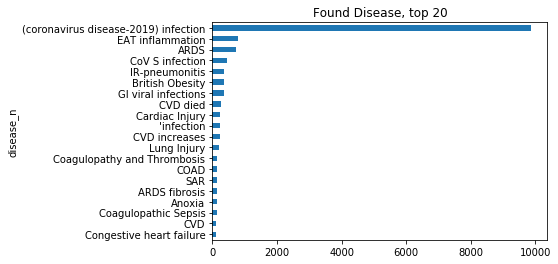

In [7]:
all_gdp_df = all_gdp_df.set_index('disease_n')
all_gdp_df.cnt[-20:].plot(kind='barh', title='Found Disease, top 20')

In [8]:
covid_rst = rst[rst.diseaseId == 'C000657245']

In [9]:
all_gdp_df = covid_rst.groupby(['geneId'])['g_name'].apply(lambda x: "%s" % ' | '.join(x)).reset_index()


def get_c(lst):
    return max([(lst.count(c),c) for c in set(lst)])[1]

all_gdp_df['mer_s'] = all_gdp_df['g_name'].map(lambda x: ' | '.join(list(sorted(set([i.strip() for i in x.split('|')])))))
# all_gdp_df['gene_n'] = all_gdp_df['g_name'].map(lambda x: [i.strip() for i in x.split('|')][0])
all_gdp_df['gene_n'] = all_gdp_df['g_name'].map(lambda x: get_c([i.strip() for i in x.split('|')]))
all_gdp_df['gene_n'] = all_gdp_df.apply(lambda x: '%s (%s)' % (str(x['gene_n']), str(x['geneId'])), axis=1)

all_gdp_df['cnt'] = covid_rst.groupby(['geneId'], as_index=False)['g_name'].size().values

all_gdp_df = all_gdp_df.sort_values(['cnt']).reset_index(drop=True)

In [10]:
all_gdp_df.loc[all_gdp_df.index == 1222,'gene_n'] = 'ORF1a/b'
all_gdp_df.loc[all_gdp_df.index == 1228,'gene_n'] = 'CRP'
all_gdp_df.loc[all_gdp_df.index == 1227,'gene_n'] = 'Spike'
all_gdp_df.loc[all_gdp_df.index == 1221,'gene_n'] = 'Fibrinogen'

In [11]:
all_gdp_df.tail(15).iloc[::-1]

,geneId,g_name,mer_s,gene_n,cnt
1230,59272,angiotensin-converting enzyme 2 | ACE2|Angiote...,2 | 2 (ACE2 | 89C8-ACE2 | ACE | ACE 2 | ACE) 2...,ACE2 (59272),2103
1229,3569,IL-6 | IL-6 | IL-6 | IL6|IL-6 | IL-6 | Il-6 | ...,Anti-interleukin-6 | IL (interleukin)-6 | IL 6...,IL-6 (3569),867
1228,1401,CRP|C-reactive protein | C-reactive protein|C-...,C - reactive protein | C Reactive Protein | C ...,CRP,539
1227,43740568,spike | spike|S|S protein | spike | S-protein|...,"S | S Protein | S protein | S, and RNA-depende...",Spike,244
1226,1636,angiotensin-converting enzyme|ACE | angiotensi...,ACE | ACE)1 | ACE1 | Angiotensin (Ang)-convert...,ACE (1636),243
1225,7124,TNF-alpha | tumour necrosis factor|TNF | TNF-a...,(TNF)-alpha | A | Anti-tumour necrosis factor ...,TNF-alpha (7124),241
1224,7113,TMPRSS2|Transmembrane Protease Serine 2|transm...,2 | 2 (TMPRSS2 | TMPRSS-2 | TMPRSS2 | TMPRSS2 ...,TMPRSS2 (7113),187
1223,3552,IL-1 | interleukin (IL)-1beta|IL-1beta | IL-1b...,"IL (interleukin)-1beta | IL""-1 beta | IL-1 | I...",IL-1beta (3552),183
1222,43740578,RdRp|Hel|ORF1a/b|ORF1b | ORF1ab|nsp6 | RdRp | ...,3-CL pro | 3CLpro | Hel | NSP | NSP 3 | NSP-7 ...,ORF1a/b,131
1221,2244,fibrinogen | fibrinogen | fibrinogen | fibrino...,FIB | Fg | Fibrin(Ogen) | Fibrin(ogen) | Fibri...,Fibrinogen,125


Text(0, 0.5, 'Protein name')

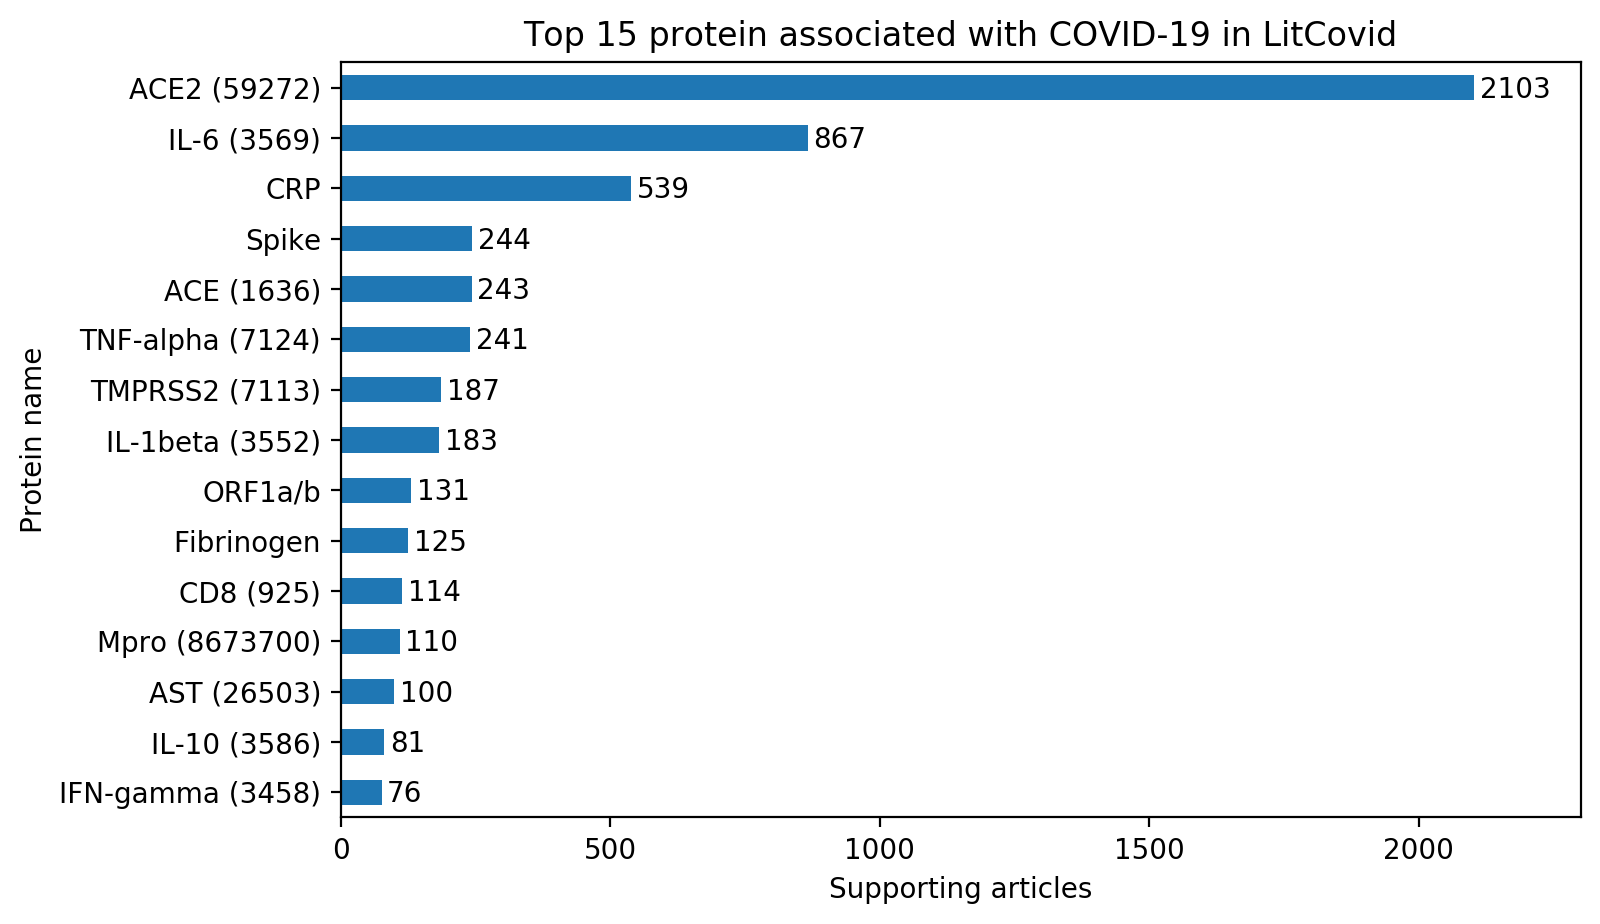

In [13]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200

_all_gdp_df = all_gdp_df.set_index('gene_n')
ax = _all_gdp_df.cnt[-15:].plot(kind='barh', title='Top 15 protein associated with COVID-19 in LitCovid', figsize=(8,5))

ax.set_xlim(0, 2300)
for p in ax.patches:
    ax.annotate("%d" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(2, 1), textcoords='offset points')

ax.set_xlabel("Supporting articles")
ax.set_ylabel("Protein name")
# plt.savefig('covid_rst.png', dpi=300)

In [15]:
#  rst[(rst['diseaseId'] == 'C000657245') & (rst['geneId'] == 57379)]